In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup as bs
import os
import datetime
from datetime import datetime as dt
from scipy import stats
import seaborn as sns
from tqdm import tqdm
import pickle
import time
import math

plt.rcParams['figure.figsize'] = [20, 10]

In [ ]:
# how many previous trading days to compare in the report
REPORT_PERIOD = 1

In [ ]:
with open("/content/drive/MyDrive/Investment_Analysis/stock_df.txt", "rb") as f:
    stock_df = pickle.loads(f.read())

In [ ]:
def get_dataframe(stock, anaysis_period = 365):
    # A huge epoch that allows most up to date info
    current_epoch = 3000000000
    past_epoch = int((dt.now() - datetime.timedelta(anaysis_period)).timestamp())
    url = f"https://query1.finance.yahoo.com/v7/finance/download/{stock}?period1={past_epoch}&period2={current_epoch}&interval=1d&events=history&includeAdjustedClose=true"
    df = pd.read_csv(url)
    return df

In [ ]:
def get_change():
    report_dic = {}

    for symbol in stock_df:
        try:
            df = stock_df[symbol]
            change = ((df.Close - df.shift(REPORT_PERIOD).Close) / df.shift(REPORT_PERIOD).Close).to_list()[-1]
            report_dic[symbol] = change

        except Exception as e:
            print(e)

    return report_dic

In [ ]:
report_dic = get_change()

In [ ]:
class change_pair:
    def __init__(self, stock, change):
        self.stock = stock
        self.change = change
    def __cmp__(self, other):
        if self.change == other.change:
            return 0
        elif self.change > other.change:
            return 1
        else:
            return -1

    def __eq__(self, other):
        return self.change == other.change

    def __ne__(self, other):
        return self.change != other.change

    def __lt__(self, other):
        return self.change < other.change

    def __le__(self, other):
        return self.change <= other.change

    def __gt__(self, other):
        return self.change > other.change

    def __ge__(self, other):
        return self.change >= other.change

changes_list = []
for k in report_dic:
    if not math.isnan(report_dic[k]):
        changes_list.append(change_pair(k, report_dic[k]))

changes_list = sorted(changes_list)
changes_list.reverse()


In [ ]:
# sort the report_dic
symbols_list = [pair.stock for pair in changes_list]
chan_list = [pair.change for pair in changes_list]

print(symbols_list[:5])
print(chan_list[:5])
print(symbols_list[-1:-5:-1])
print(chan_list[-1:-5:-1])

['ELC', 'ISIG', 'PIXY', 'FTK', 'CPOP']
[29.361446987951812, 0.6481802426343155, 0.4303959131545339, 0.40874999999999995, 0.35882352941176476]
['PBTS', 'PAVMW', 'ADXS', 'SRTS']
[-0.25451612903225806, -0.2495, -0.24500000000000008, -0.22671568627450986]


In [ ]:
# list of corresponding brightness
labels = [i/10000 for i in range(2000, -1, -100)]
brightnesses = [i for i in range(255, 34, -11)]

# dimension of the matrix
image_matrix = []
row = []
DIMENSION = 84


for i, pair in enumerate(changes_list):
    count = i % DIMENSION
    k = pair.stock
    v = pair.change
    idx = 0
    while abs(v) < labels[idx]:
        idx += 1
    brightness = brightnesses[idx]
    if v > 0:
        color = (0, brightness, 0)
    else:
        color = (brightness, 0, 0)
    row.append(color)

    if i == len(report_dic)-1 and count != DIMENSION - 1:
        while len(image_matrix) != DIMENSION:
            while len(row) < DIMENSION:
                row.append((0,0,0))
            image_matrix.append(row)
            row = []

    if count == DIMENSION - 1:
        image_matrix.append(row)
        row = []


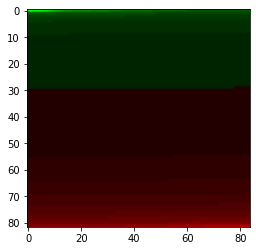

In [ ]:
plt.imshow(image_matrix)
plt.show()